In [17]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

In [28]:
# Load the dataset
file_path = file_path = r"D:\Python small codes_01\Real_State_Investment_2024\real_estate_utah.csv"
df = pd.read_csv(file_path)

# Convert 'lastSoldOn' to datetime format
df['lastSoldOn'] = pd.to_datetime(df['lastSoldOn'], format='%Y-%m-%d', errors='coerce')

# Check for missing values
missing_values = df.isnull().sum()

# Remove duplicates if any
df = df.drop_duplicates()

# Display dataset summary
print("Missing Values:\n", missing_values)
print("\nDataset Info:")
df.info()

# Display the first few rows
print("\nPreview of Cleaned Data:")
print(df.head())

Missing Values:
 type             0
year_built       0
beds             0
baths            0
baths_full       0
baths_half       0
garage           0
lot_sqft         0
sqft             0
stories          0
lastSoldOn    4440
listPrice        0
status           0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 4297 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        4297 non-null   object        
 1   year_built  4297 non-null   int64         
 2   beds        4297 non-null   int64         
 3   baths       4297 non-null   int64         
 4   baths_full  4297 non-null   int64         
 5   baths_half  4297 non-null   int64         
 6   garage      4297 non-null   int64         
 7   lot_sqft    4297 non-null   int64         
 8   sqft        4297 non-null   int64         
 9   stories     4297 non-null   int64         
 10  lastSoldOn  0 non-null   

In [30]:
# Selecting relevant columns
features = ['listPrice', 'sqft', 'beds', 'baths', 'garage', 'lot_sqft']
df_selected = df[features]

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=features)

# Display scaled data
print("\nScaled Data Preview:")
print(df_scaled.head())



Scaled Data Preview:
   listPrice      sqft      beds     baths  garage  lot_sqft
0   0.001875  0.033293  0.000000  0.022222    0.10  0.000118
1   0.016646  0.176991  0.166667  0.066667    0.10  0.000094
2   0.008123  0.168763  0.166667  0.066667    0.05  0.000016
3   0.006250  0.100311  0.166667  0.044444    0.10  0.000020
4   0.001458  0.114805  0.166667  0.000000    0.10  0.001450


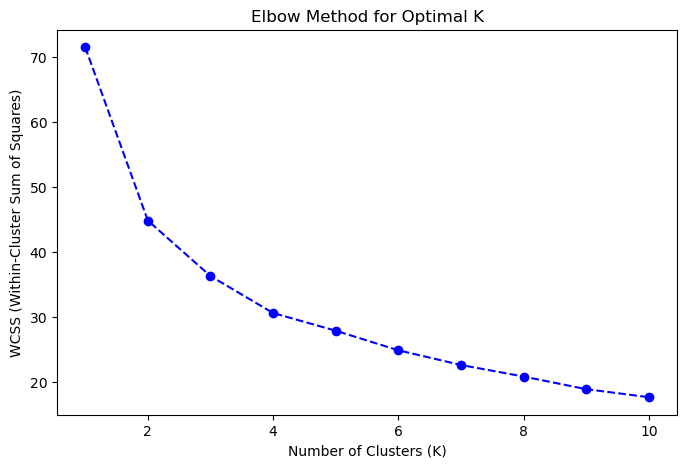

In [34]:
# Find the optimal K using the Elbow Method
wcss = []
K_range = range(1, 11)  # Trying K values from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = Sum of squared distances to closest centroid

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [36]:
# Apply K-Means clustering
K_OPTIMAL = 3  # Replace with your chosen K value
kmeans = KMeans(n_clusters=K_OPTIMAL, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataset
df['Cluster'] = df_scaled['Cluster']

# Display cluster counts
print("\nNumber of properties in each cluster:")
print(df['Cluster'].value_counts())

# Display sample data with clusters
print("\nPreview of Data with Cluster Labels:")
print(df[['listPrice', 'sqft', 'beds', 'baths', 'garage', 'lot_sqft', 'Cluster']].head())

# Save clustered data to CSV for Power BI visualization
df.to_csv("real_estate_segmented.csv", index=False)
print("\nSegmented data saved as 'real_estate_segmented.csv'")



Number of properties in each cluster:
Cluster
0.0    2996
2.0    1050
1.0     110
Name: count, dtype: int64

Preview of Data with Cluster Labels:
   listPrice  sqft  beds  baths  garage  lot_sqft  Cluster
0      90000   696     1      1       2     71438      0.0
1     799000  3700     4      3       2     56628      2.0
2     389900  3528     4      3       1     10019      0.0
3     300000  2097     4      2       2     12632      0.0
4      70000  2400     4      0       2    872071      0.0

Segmented data saved as 'real_estate_segmented.csv'


In [7]:
import pandas as pd

# Load the dataset
file_path = "C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/real_estate_utah.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Show basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        4440 non-null   object
 1   year_built  4440 non-null   int64 
 2   beds        4440 non-null   int64 
 3   baths       4440 non-null   int64 
 4   baths_full  4440 non-null   int64 
 5   baths_half  4440 non-null   int64 
 6   garage      4440 non-null   int64 
 7   lot_sqft    4440 non-null   int64 
 8   sqft        4440 non-null   int64 
 9   stories     4440 non-null   int64 
 10  lastSoldOn  4440 non-null   object
 11  listPrice   4440 non-null   int64 
 12  status      4440 non-null   object
dtypes: int64(10), object(3)
memory usage: 451.1+ KB
None
            type  year_built  beds  baths  baths_full  baths_half  garage  \
0  single_family        2020     1      1           1           1       2   
1  single_family        1968     4      3           2           1       2   
2  s

In [11]:
import pandas as pd

# Load dataset
file_path = "C:/ProgramData/MySQL/MySQL Server 9.2/Uploads/real_estate_utah.csv"
df = pd.read_csv(file_path)

# Display basic info
print(df.info())

# Count missing values
print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        4440 non-null   object
 1   year_built  4440 non-null   int64 
 2   beds        4440 non-null   int64 
 3   baths       4440 non-null   int64 
 4   baths_full  4440 non-null   int64 
 5   baths_half  4440 non-null   int64 
 6   garage      4440 non-null   int64 
 7   lot_sqft    4440 non-null   int64 
 8   sqft        4440 non-null   int64 
 9   stories     4440 non-null   int64 
 10  lastSoldOn  4440 non-null   object
 11  listPrice   4440 non-null   int64 
 12  status      4440 non-null   object
dtypes: int64(10), object(3)
memory usage: 451.1+ KB
None

Missing Values:
type          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int

In [15]:
df['lastSoldOn'] = pd.to_datetime(df['lastSoldOn'], format='%m-%d-%y', errors='coerce')


# Verify the changes
print(df[['lastSoldOn']].head())


  lastSoldOn
0 2018-05-31
1 2018-05-31
2 2018-05-31
3 2018-04-16
4 2018-05-31


In [18]:
print(df.describe())


        year_built         beds        baths   baths_full   baths_half  \
count  4440.000000  4440.000000  4440.000000  4440.000000  4440.000000   
mean   1997.942793     3.894595     2.454730     2.238964     1.025000   
min    1860.000000     1.000000     0.000000     1.000000     1.000000   
25%    1997.000000     3.000000     2.000000     2.000000     1.000000   
50%    2003.000000     4.000000     3.000000     2.000000     1.000000   
75%    2007.000000     4.000000     3.000000     3.000000     1.000000   
max    2026.000000    19.000000    45.000000    45.000000     6.000000   
std      23.609067     1.265647     1.789238     1.165071     0.194672   

            garage      lot_sqft          sqft      stories  \
count  4440.000000  4.440000e+03   4440.000000  4440.000000   
mean      2.334234  5.525239e+05   2712.318243     1.999775   
min       0.000000  4.360000e+02      0.000000     1.000000   
25%       2.000000  9.583000e+03   1842.000000     2.000000   
50%       2.000000

In [20]:
print(df['type'].value_counts())   # Count of each property type
print(df['status'].value_counts()) # Count of each sale status


type
single_family                  2883
land                            801
townhomes                       344
mobile                          206
condos                          156
townhouse                        14
other                            12
farm                              9
condo_townhome_rowhome_coop       8
condo_townhome                    6
condo                             1
Name: count, dtype: int64
status
for_sale          4185
ready_to_build     255
Name: count, dtype: int64


In [22]:
print(df.duplicated().sum())  # Count duplicate rows



142


In [24]:
df = df.drop_duplicates()

In [26]:
print(df.isnull().sum())

type          0
year_built    0
beds          0
baths         0
baths_full    0
baths_half    0
garage        0
lot_sqft      0
sqft          0
stories       0
lastSoldOn    0
listPrice     0
status        0
dtype: int64


In [30]:
df = pd.get_dummies(df, columns=['type', 'status'], drop_first=True)


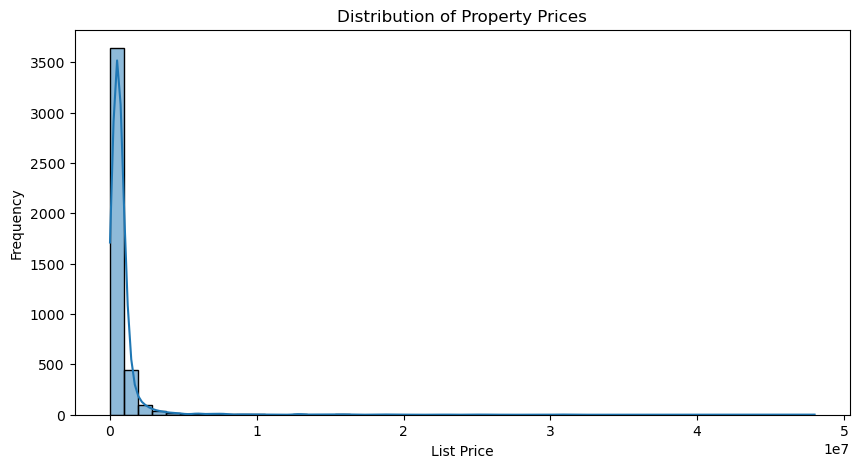

In [32]:
import matplotlib.pyplot as plt  
import seaborn as sns  

plt.figure(figsize=(10, 5))
sns.histplot(df['listPrice'], bins=50, kde=True)
plt.xlabel('List Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()


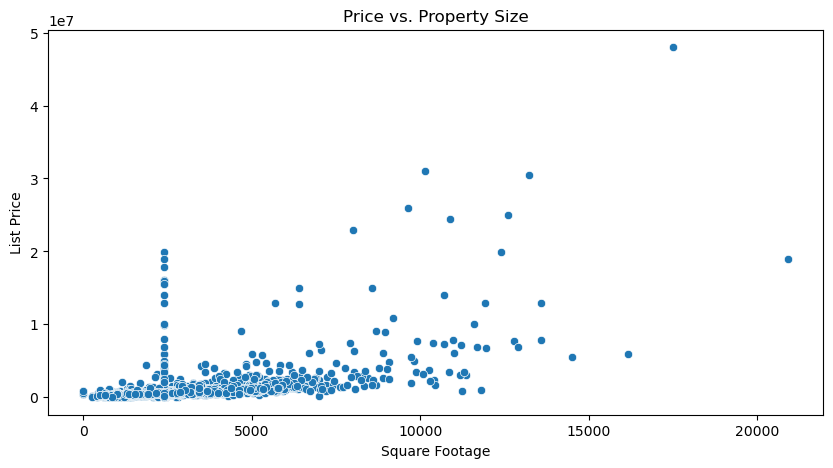

In [34]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['sqft'], y=df['listPrice'])
plt.xlabel('Square Footage')
plt.ylabel('List Price')
plt.title('Price vs. Property Size')
plt.show()


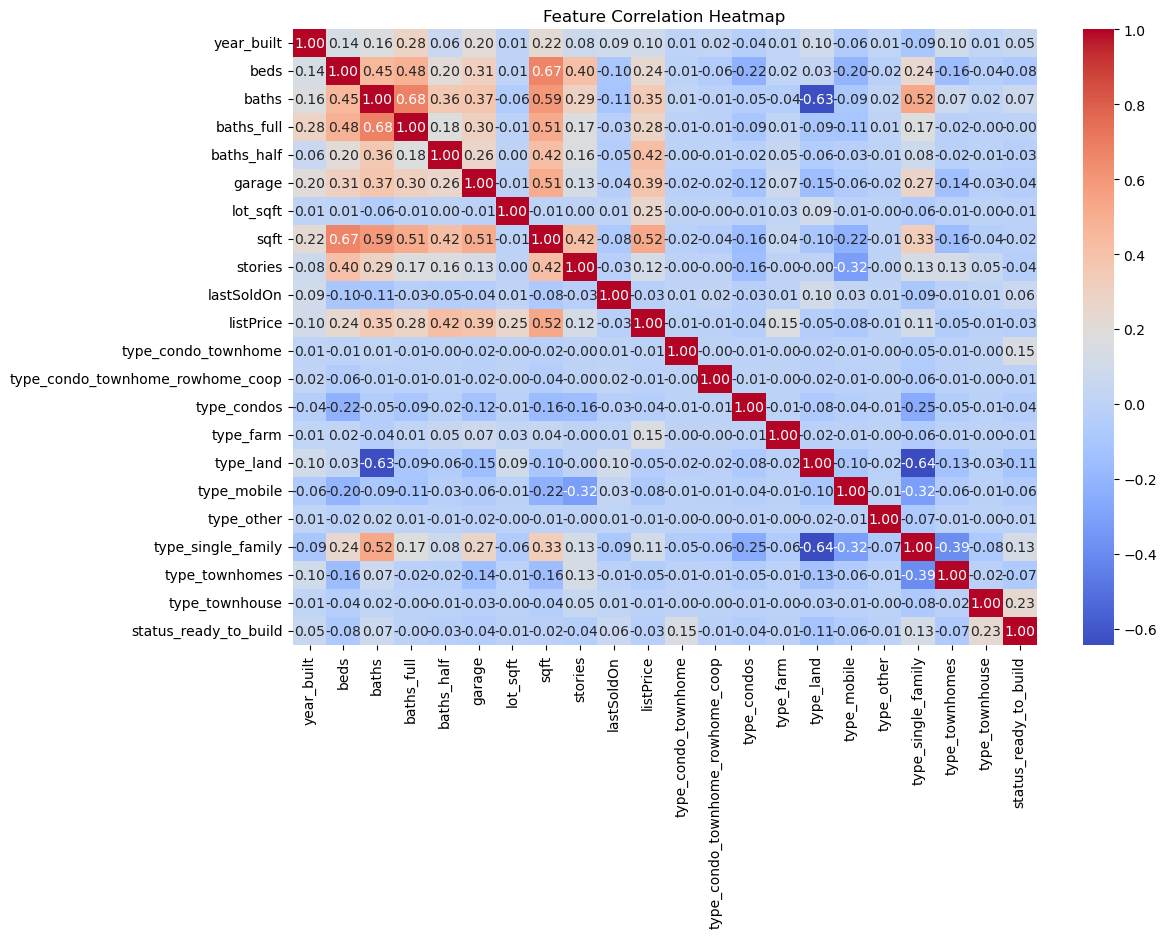

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [38]:
X = df.drop(columns=['listPrice'])  # Features
y = df['listPrice']  # Target Variable


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
def categorize_price(price):
    if price > 1000000:
        return "Luxury"
    elif price < 400000:
        return "Affordable"
    else:
        return "Mid-range"

df['home_category'] = df['listPrice'].apply(categorize_price)


In [50]:
print(df['home_category'].value_counts())


home_category
Mid-range     2411
Affordable    1313
Luxury         574
Name: count, dtype: int64


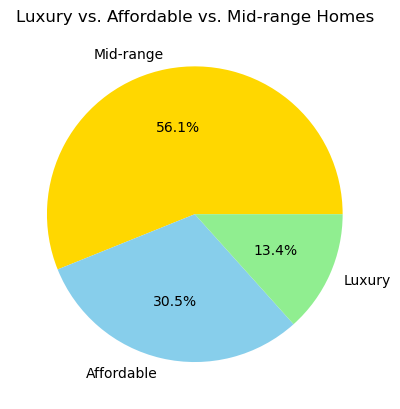

In [52]:
import matplotlib.pyplot as plt

df['home_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'skyblue', 'lightgreen'])
plt.title("Luxury vs. Affordable vs. Mid-range Homes")
plt.ylabel("")  # Hide y-label
plt.show()


C:\Users\A\AppData\Local\Temp\ipykernel_31068\2906297811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['home_category'], palette=['gold', 'skyblue', 'lightgreen'])


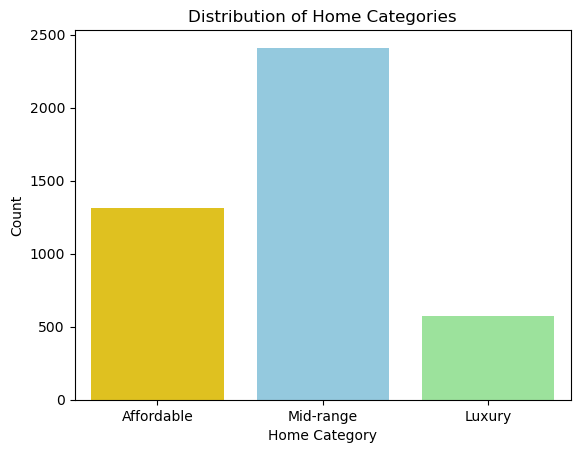

In [54]:
import seaborn as sns

sns.countplot(x=df['home_category'], palette=['gold', 'skyblue', 'lightgreen'])
plt.title("Distribution of Home Categories")
plt.xlabel("Home Category")
plt.ylabel("Count")
plt.show()


In [56]:
df.to_csv("cleaned_real_estate.csv", index=False)
